# Numerical integration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Consider the following initial conditions for position and velocity:
$$x = 1888980.04103698m$$
$$y = 6652209.67475597m$$
$$z = 902482.883545056m$$
$$v_x = -9585.79511076297m/s$$
$$v_y = 2413.57051166562m/s$$
$$v_z = 2273.50409709003m/s$$

that correspond to an orbit with $a = 34869261 m$.

The initial conditions are as follows:

In [2]:
x = 1888980.04103698 #m
y = 6652209.67475597 #m
z = 902482.883545056 #m
v_x = -9585.79511076297 #m/s
v_y = 2413.57051166562 #m/s
v_z = 2273.50409709003 #m/s

x_vec = np.array([x,y,z])
v_vec = np.array([v_x,v_y,v_z])

a = 34869261 #m
mu = 3.9860064E+14 #𝑚3/𝑠2
R = 6378139 #m

# Orbit period is calculated through Kepler's Third Law:
T = np.sqrt(a**3*(4*np.pi**2/mu)) #s
delta_t = T/400

## Euler

Using the Cowell method (conventional), integrate the keplerian orbit for an orbital period using an Euler of fixed step $\Delta t = T / 400 $, where T is the orbital period.

Here we define the derivative of the state vector:

In [3]:
def X_ddot(t, X):
    '''
    Returns the derivative of the state vector X
    ----------
    Arguments:
        t {float} -- time, in seconds
        X {np.array} -- state vector=(x, y, z, vx, vy, vz)
    ----------
    Returns:
        (6,1) np.array -- (xdot, ydot, zdot, vxdot, vydot, vzdot)
    '''
    
    x_dot = X[3:]
    v_dot = -mu*X[:3]/np.linalg.norm(X[:3])**3 # simply the acceleration
    X_dot_dot = np.concatenate((x_dot, v_dot), axis=None)    
    
    return X_dot_dot

Here we define the Euler integrator:

In [4]:
def Euler(f, x0, tf, dt, t0=0):
    # Time vector
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Constructing final vector
    nx = x0.size
    x = np.zeros((nx, nt))
    
    # Initial conditions
    x[:,0] = x0
    
    for k in range(nt-1):
        # At the kth time step, dx is computed
        dx = dt*f(t[k], x[:, k])
        
        #dx is used to calculate x at the next time step
        x[:, k+1] = x[:, k] + dx
        
    return x, t

Using both functions above, all we have to do is integrate the orbit:

In [5]:
f = lambda t, X: X_ddot(t, X)

x0 = np.concatenate((x_vec, v_vec))
t0 = 0
tf = T
dt = delta_t

x, t = Euler(f, x0, tf, dt, t0)

Now all that's left is plotting the results!

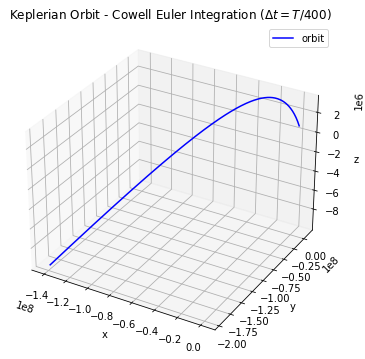

In [6]:
fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection="3d")
ax.plot3D(x[0][:], x[1][:], x[2][:], 'blue', label="orbit")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Keplerian Orbit - Cowell Euler Integration ($\Delta t=T/400$)")


plt.show()

The results are horrible because the timestep is too big.


If we plot with $dt = T/8000$, here's what we get:

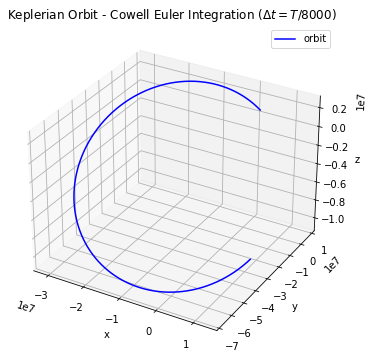

In [7]:
f = lambda t, X: X_ddot(t, X)

x0 = np.concatenate((x_vec, v_vec))
t0 = 0
tf = T
dt = delta_t/20

x2, t2 = Euler(f, x0, tf, dt, t0)

fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection="3d")
ax.plot3D(x2[0][:], x2[1][:], x2[2][:], 'blue', label="orbit")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Keplerian Orbit - Cowell Euler Integration ($\Delta t=T/8000$)")


plt.show()

## RK4

Using the Cowell method (conventional), integrate the keplerian orbit for an orbital period using a Runge-Kutta 4 of fixed step $\Delta t = T / 20 $, where T is the orbital period.

Here we define the derivative of the state vector:

In [8]:
def X_ddot(t, X):
    '''
    Returns the derivative of the state vector X
    ----------
    Arguments:
        t {float} -- time, in seconds
        X {np.array} -- state vector=(x, y, z, vx, vy, vz)
    ----------
    Returns:
        (6,1) np.array -- (xdot, ydot, zdot, vxdot, vydot, vzdot)
    '''
    
    x_dot = X[3:]
    v_dot = -mu*X[:3]/np.linalg.norm(X[:3])**3 # simply the acceleration
    X_dot_dot = np.concatenate((x_dot, v_dot), axis=None)    
    
    return X_dot_dot

Here we define the RK4 integrator:

In [9]:
def RK4(f, x0, tf, dt, t0=0):
    # Time vector
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Constructing final vector
    nx = x0.size
    x = np.zeros((nx, nt))
    
    # Initial conditions
    x[:,0] = x0
    
    for k in range(nt-1):
        # At the kth time step, each parameter k_n is computed
        k1 = dt*f(t[k], x[:, k])
        k2 = dt*f(t[k] + dt/2, x[:, k] + k1/2)
        k3 = dt*f(t[k] + dt/2, x[:, k] + k2/2)
        k4 = dt*f(t[k] + dt, x[:, k] + k3)
        
        # k_ns are used to calculate dx
        dx = (k1 + 2*k2 + 2* k3 + k4)/6
        
        #dx is used to calculate x at the next time step
        x[:, k+1] = x[:, k] + dx
        
    return x, t

Using both functions above, all we have to do is integrate the orbit:

In [10]:
f = lambda t, X: X_ddot(t, X)

x0 = np.concatenate((x_vec, v_vec))
t0 = 0
tf = T
dt = delta_t

x, t = RK4(f, x0, tf, dt, t0)

Now all that's left is plotting the results!

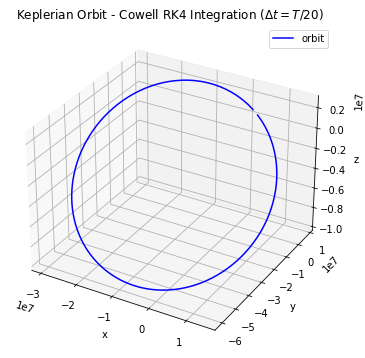

In [11]:
fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection="3d")
ax.plot3D(x[0][:], x[1][:], x[2][:], 'blue', label="orbit")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Keplerian Orbit - Cowell RK4 Integration ($\Delta t=T/20$)")


plt.show()

The results are horrible because the timestep is too big.


If we plot with $dt = T/400$, here's what we get:

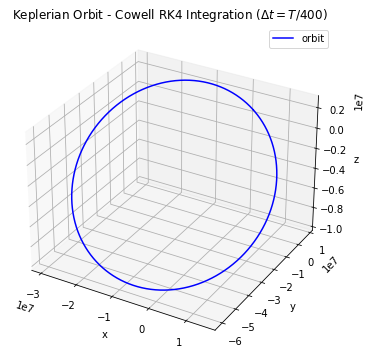

In [12]:
f = lambda t, X: X_ddot(t, X)

x0 = np.concatenate((x_vec, v_vec))
t0 = 0
tf = T
dt = delta_t/20

x2, t2 = RK4(f, x0, tf, dt, t0)

fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection="3d")
ax.plot3D(x2[0][:], x2[1][:], x2[2][:], 'blue', label="orbit")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Keplerian Orbit - Cowell RK4 Integration ($\Delta t=T/400$)")


plt.show()

## Adams-Bashford-Moulton

Let's do the same using the predictor-corrector algorithm of Adams-Bashfort-Moulton (order 4):

**Predictor** (Adams-Bashford):
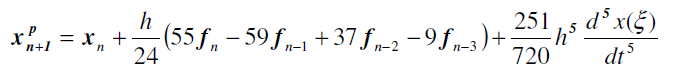

**Corrector** (Adams-Moulton):
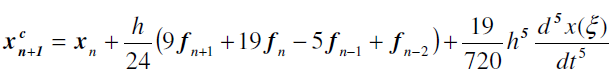

In the latter, $f_{n+1}$ is obtained from $x_{n+1}^p$:
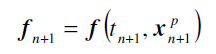

In [13]:
def ABM(f, x0, sf, ds, s0=0):
    # Time vector
    s = np.arange(s0, sf, ds)
    ns = s.size
    
    # Constructing final vector
    nx = x0.size
    x = np.zeros((nx, ns))
    
    # Initial conditions
    x[:,0] = x0
    
    # First we initialize with an RK4:
    for k in range(0, 3):
        # At the kth time step, each parameter k_n is computed
        k1 = ds*f(s[k], x[:, k])
        k2 = ds*f(s[k] + ds/2, x[:, k] + k1/2)
        k3 = ds*f(s[k] + ds/2, x[:, k] + k2/2)
        k4 = ds*f(s[k] + ds, x[:, k] + k3)
        
        # k_ns are used to calculate dx
        dx = (k1 + 2*k2 + 2* k3 + k4)/6
        
        #dx is used to calculate x at the next time step
        x[:, k+1] = x[:, k] + dx
    
    # Proceeding to the ABM integration:
    for k in range(3, ns-1):
        f_m3 = f(s[k-3], x[:, k-3]) #f_{n-3}
        f_m2 = f(s[k-2], x[:, k-2]) #f_{n-2}
        f_m1 = f(s[k-1], x[:, k-1]) #f_{n-1}
        f_0 = f(s[k], x[:, k]) #f_{n}
        
        ### Predictor ###
        dx = (ds/24) * (55*f_0 - 59*f_m1 + 37*f_m2 - 9*f_m3)
        x[:, k+1] = x[:, k] + dx
        
        f_p1 = f(s[k+1], x[:, k+1]) #f_{n+1}
        
        ### Corrector ###
        dx = (ds/24) * (9*f_p1 + 19*f_0 - 5*f_m1 + f_m2)
        #dx is used to calculate x at the next time step
        x[:, k+1] = x[:, k] + dx
        
    return x

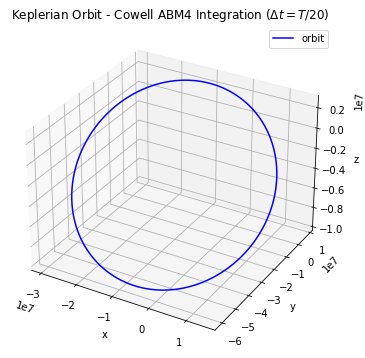

In [14]:
f = lambda t, X: X_ddot(t, X)

x0 = np.concatenate((x_vec, v_vec))
t0 = 0
tf = T
dt = delta_t/20

x_pc1, t2 = RK4(f, x0, tf, dt, t0)

fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection="3d")
ax.plot3D(x_pc1[0][:], x_pc1[1][:], x_pc1[2][:], 'blue', label="orbit")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Keplerian Orbit - Cowell ABM4 Integration ($\Delta t=T/20$)")


plt.show()

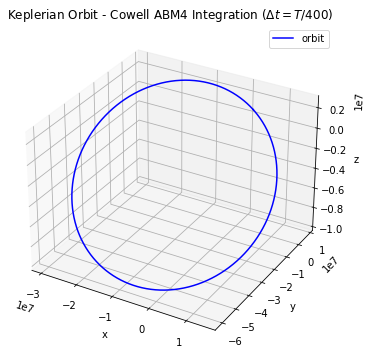

In [15]:
f = lambda t, X: X_ddot(t, X)

x0 = np.concatenate((x_vec, v_vec))
t0 = 0
tf = T
dt = delta_t/400

x_pc2, t2 = RK4(f, x0, tf, dt, t0)

fig = plt.figure(figsize=(12, 6))

ax = plt.axes(projection="3d")
ax.plot3D(x_pc2[0][:], x_pc2[1][:], x_pc2[2][:], 'blue', label="orbit")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Keplerian Orbit - Cowell ABM4 Integration ($\Delta t=T/400$)")


plt.show()

## Comparison: RK4 vs. ABM4

In [16]:
data = pd.DataFrame({'x':[x_vec[0], x[0][-1], x2[0][-1], x_pc1[0][-1], x_pc2[0][-1]], \
                    'y':[x_vec[1], x[1][-1], x2[1][-1], x_pc1[1][-1], x_pc2[1][-1]], \
                    'z':[x_vec[2], x[2][-1], x2[2][-1], x_pc1[2][-1], x_pc2[2][-1]], \
                    'vx':[v_vec[0], x[3][-1], x2[3][-1], x_pc1[3][-1], x_pc2[3][-1]], \
                    'vy':[v_vec[1], x[4][-1], x2[4][-1], x_pc1[4][-1], x_pc2[4][-1]], \
                    'vz':[v_vec[2], x[5][-1], x2[5][-1], x_pc1[5][-1], x_pc2[5][-1]]},
        index=['Real', 'RK4 (T/20)', 'RK4 (T/400)', 'ABM4 (T/20)', 'ABM4 (T/400)'])

In [17]:
errors = pd.DataFrame({'x':[0.0, abs(x[0][-1]-x_vec[0])/x_vec[0], abs(x2[0][-1]-x_vec[0])/x_vec[0], abs(x_pc1[0][-1]-x_vec[0])/x_vec[0], abs(x_pc2[0][-1]-x_vec[0])/x_vec[0]], \
                    'y':[0.0, abs(x[1][-1]-x_vec[1])/x_vec[1], abs(x2[1][-1]-x_vec[1])/x_vec[1], abs(x_pc1[1][-1]-x_vec[1])/x_vec[1], abs(x_pc2[1][-1]-x_vec[1])/x_vec[1]], \
                    'z':[0.0, abs(x[2][-1]-x_vec[2])/x_vec[2], abs(x2[2][-1]-x_vec[2])/x_vec[2], abs(x_pc1[2][-1]-x_vec[2])/x_vec[2], abs(x_pc2[2][-1]-x_vec[2])/x_vec[2]], \
                    'vx':[0.0, abs(x[3][-1]-v_vec[0])/v_vec[0], abs(x2[3][-1]-v_vec[0])/v_vec[0], abs(x_pc1[3][-1]-v_vec[0])/v_vec[0], abs(x_pc2[3][-1]-v_vec[0])/v_vec[0]], \
                    'vy':[0.0, abs(x[4][-1]-v_vec[1])/v_vec[1], abs(x2[4][-1]-v_vec[1])/v_vec[1], abs(x_pc1[4][-1]-v_vec[1])/v_vec[1], abs(x_pc2[4][-1]-v_vec[1])/v_vec[1]], \
                    'vz':[0.0, abs(x[5][-1]-v_vec[2])/v_vec[2], abs(x2[5][-1]-v_vec[2])/v_vec[2], abs(x_pc1[5][-1]-v_vec[2])/v_vec[2], abs(x_pc2[5][-1]-v_vec[2])/v_vec[2]]},
         index=['Real', 'RK4 (T/20)', 'RK4 (T/400)', 'ABM4 (T/20)', 'ABM4 (T/400)'])

In [18]:
errors

,x,y,z,vx,vy,vz
Real,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RK4 (T/20),0.750029,0.067884,0.392248,-0.047643,0.468846,0.056244
RK4 (T/400),0.041065,0.002977,0.020443,-0.001914,0.026197,0.003740
ABM4 (T/20),0.041065,0.002977,0.020443,-0.001914,0.026197,0.003740
ABM4 (T/400),0.002055,0.000147,0.001020,-0.000094,0.001312,0.000189


Here's what we get for the errors visually:

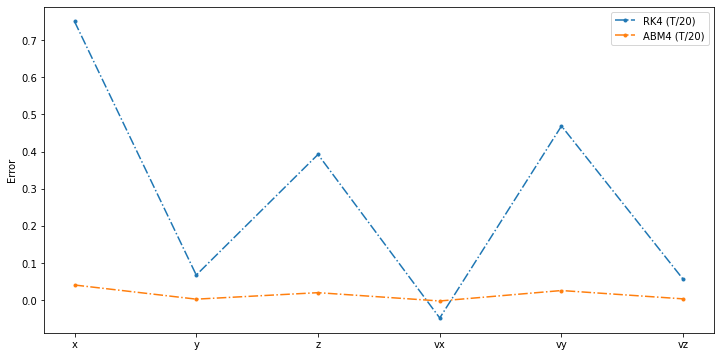

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(errors.loc['RK4 (T/20)'], linestyle='-.', marker='.', label='RK4 (T/20)')
#plt.plot(errors.loc['RK4 (T/400)'], linestyle='-.', marker='.', label='RK4 (T/400)')
plt.plot(errors.loc['ABM4 (T/20)'], linestyle='-.', marker='.', label='ABM4 (T/20)')
#plt.plot(errors.loc['ABM4 (T/400)'], linestyle='-.', marker='.', label='ABM4 (T/400)')
plt.ylabel("Error")
plt.legend()
plt.show()

<ipython-input-22-ff5066c9d0cd>:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(errors.loc['RK4 (T/400)'].values), linestyle='-.', marker='.', label='RK4 (T/400)')
<ipython-input-22-ff5066c9d0cd>:5: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(errors.loc['ABM4 (T/400)'].values), linestyle='-.', marker='.', label='ABM4 (T/400)')


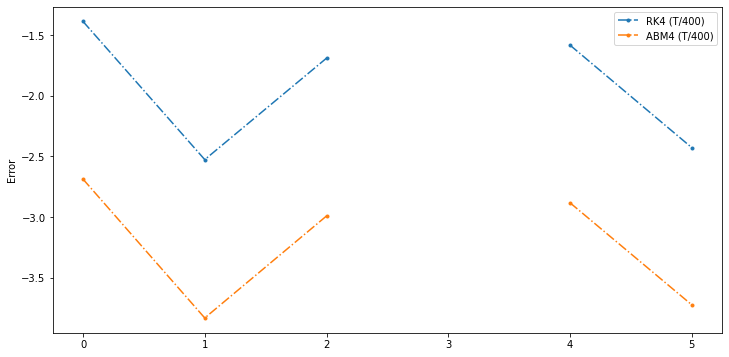

In [22]:
plt.figure(figsize=(12, 6))
#plt.plot(errors.loc['RK4 (T/20)'], linestyle='-.', marker='.', label='RK4 (T/20)')
plt.plot(np.log10(errors.loc['RK4 (T/400)'].values), linestyle='-.', marker='.', label='RK4 (T/400)')
#plt.plot(errors.loc['ABM4 (T/20)'], linestyle='-.', marker='.', label='ABM4 (T/20)')
plt.plot(np.log10(errors.loc['ABM4 (T/400)'].values), linestyle='-.', marker='.', label='ABM4 (T/400)')
plt.ylabel("Error")
plt.legend()
plt.show()